# Твиты о катастрофах

Twitter стал важным каналом связи во время чрезвычайных ситуаций.
Наличие смартфонов позволяет людям сообщать о чрезвычайной ситуации, за которой они наблюдают, в режиме реального времени. Из-за этого все больше агентств заинтересованы в программном мониторинге Твиттера (например, организации по оказанию помощи при стихийных бедствиях и информационные агентства).

Но не всегда ясно, действительно ли человек говорит о катастрофе.

![alt text](data/twit_example.png "Example")

В этом ноутбуке:
- exploratory data analysis
- data cleaning

#### Задача: реплицировать output у блоков без кода. Можно не заморачиватся с дизайном графиков, главное функциональность \ информативность.

Импорт необходимых библиотек. 

In [2]:
import string
import re
from collections import defaultdict
from collections import  Counter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk import download
from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline

In [3]:
download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dramoretskiyas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
plt.style.use('ggplot')
stop=set(stopwords.words('english'))
special = string.punctuation

Загрузка данных и получение общего представления 

In [5]:
data = pd.read_csv('data/train.csv')

In [7]:
data.head(3)

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   

   target  
0       1  
1       1  
2       1

In [8]:
data.iloc[:3]

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   

   target  
0       1  
1       1  
2       1

In [9]:
data.loc[:3]

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   

   target  
0       1  
1       1  
2       1  
3       1

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   

   target  
0       1  
1       1  
2       1

There are 7613 rows and 5 columns in train


### Распределение классов

In [15]:
x = data['target'].value_counts()
sns.barplot(x.index, x)
plt.gca().set_label('samples')

/home/dramoretskiyas/PycharmVenv/ml2course/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


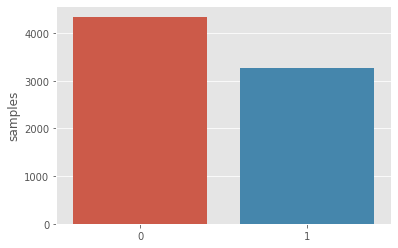

Распределение по классам: твитов с классом 0 (без катастрофы) больше, чем с классом 1 (твиты о катастрофе) 

### Exploratory Data Analysis of tweets

Во-первых, мы проведем очень простой анализ, то есть анализ на уровне символов, слов и предложений. 

Количество символов в твитах 

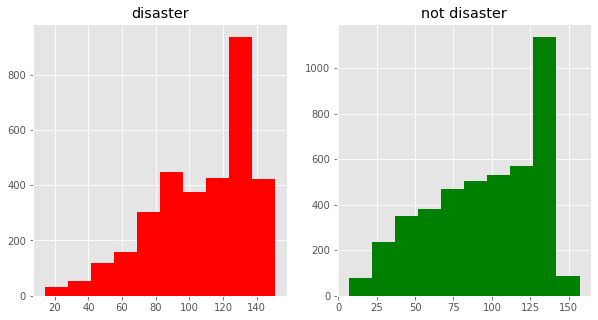

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
x = data[data['target'] == 1]['text'].str.len()
ax1.hist(x, color='red')
ax1.set_title('disaster')
x = data[data['target'] == 0]['text'].str.len()
ax2.hist(x, color='green')
ax2.set_title('not disaster')
plt.show()

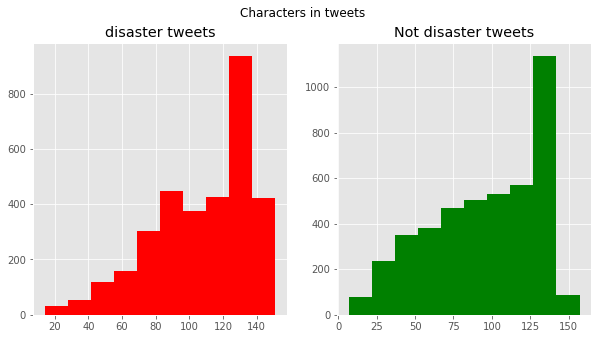

120–140 символов в твите являются наиболее распространенными среди обоих. 

#### Кол-во слов в твитах

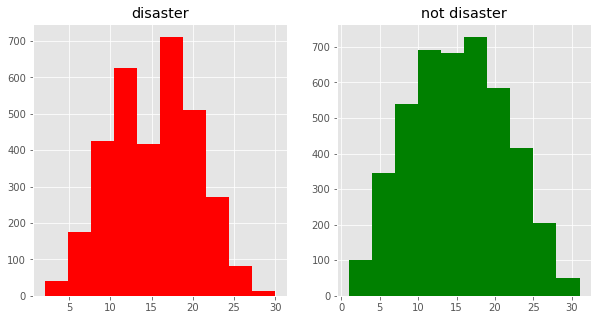

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
x = data[data['target'] == 1]['text'].str.split().map(lambda x: len(x))
ax1.hist(x, color='red')
ax1.set_title('disaster')
x = data[data['target'] == 0]['text'].str.split().map(lambda x: len(x))
ax2.hist(x, color='green')
ax2.set_title('not disaster')
plt.show()

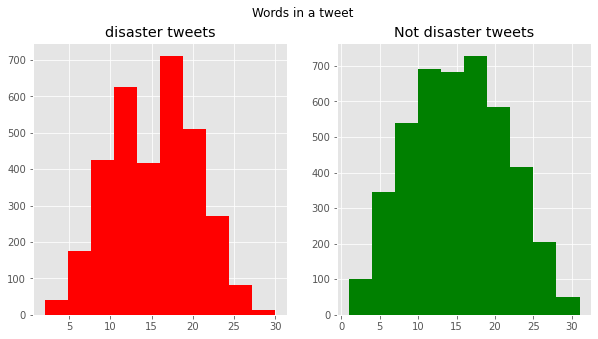

Средняя длина слова

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
x = data[data['target'] == 1]['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.histplot(x.map(lambda x: np.mean(x)), ax=ax1, color='red', kde=True)
ax1.set_title('disaster')
x = data[data['target'] == 0]['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.histplot(x.map(lambda x: np.mean(x)), ax=ax2, color='green', kde=True)
ax2.set_title('not disaster')
plt.show()

In [28]:
def create_corpus(target):
    corpus=[]
    
    for x in data[data['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

Общие стоп слова в твитах (стоп слова - переменная `stop`)

Сначала разберем твиты с классом 0.

In [30]:
corpus_0 = create_corpus(0)
corpus_1 = create_corpus(1)

<AxesSubplot:>

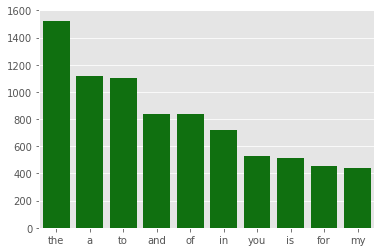

In [38]:
dic = defaultdict(int)

for i in corpus_0:
    if i in stop:
        dic[i] +=1

top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:10]
x, y = map(list, zip(*top))
sns.barplot(x=x, y=y, color='green')

<BarContainer object of 10 artists>

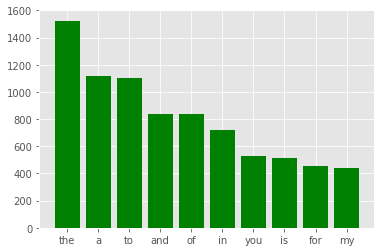

Теперь проанализируем твиты с классом 1. 

<AxesSubplot:>

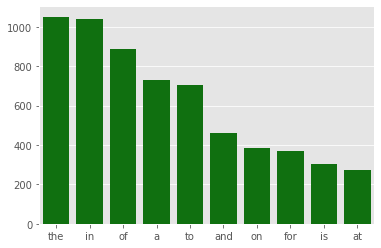

In [39]:
dic = defaultdict(int)

for i in corpus_1:
    if i in stop:
        dic[i] +=1

top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:10]
x, y = map(list, zip(*top))
sns.barplot(x=x, y=y, color='green')

<BarContainer object of 10 artists>

В обоих случаях доминирует «the», за которым следует «a» в классе 0 и «in» в классе 1. 

### Анализ пунктуации

Сначала проверим твиты, указывающие на настоящую катастрофу(символы пунктуации в переменной `special`).

<AxesSubplot:>

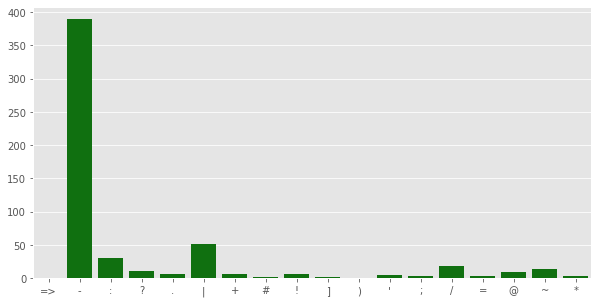

In [42]:
dic = defaultdict(int)

for i in corpus_1:
    if i in special:
        dic[i] +=1

plt.figure(figsize=(10, 5))
x, y = map(list, zip(*dic.items()))
sns.barplot(x=x, y=y, color='green')

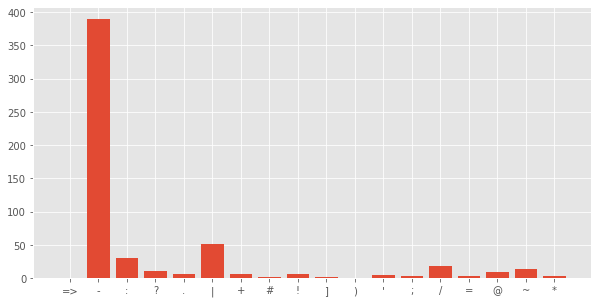

Тепер для класса 0

<AxesSubplot:>

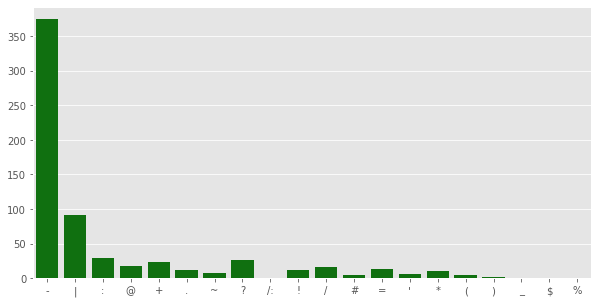

In [43]:
dic = defaultdict(int)

for i in corpus_0:
    if i in special:
        dic[i] +=1

plt.figure(figsize=(10, 5))
x, y = map(list, zip(*dic.items()))
sns.barplot(x=x, y=y, color='green')

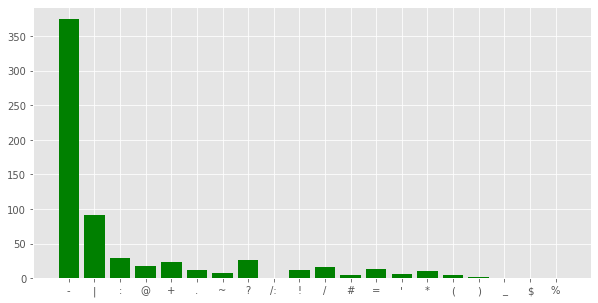

Распространенные слова

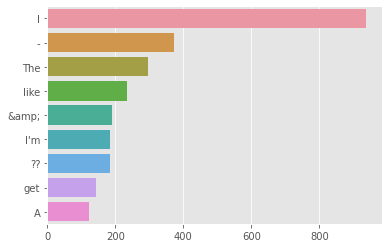

In [53]:
counter = Counter(corpus_0)
most = counter.most_common()
x = []
y = []

for word, value in most[:50]:
    if word not in stop:
        x.append(word)
        y.append(value)

sns.barplot(x=y, y=x);

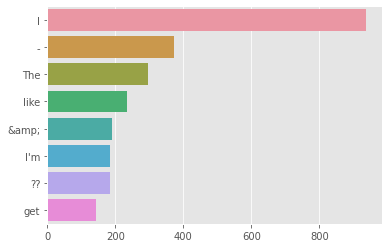

Анализ n-грам

Проведем анализ биграмм (n = 2) над твитами, проверим наиболее распространенные биграммы в твитах. 

In [52]:
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

<AxesSubplot:>

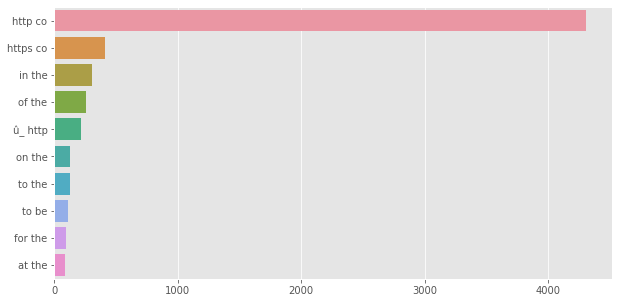

In [61]:
plt.figure(figsize=(10, 5))
bigram = get_top_tweet_bigrams(data['text'])[:10]
x, y = map(list, zip(*bigram))
sns.barplot(x=y, y=x)

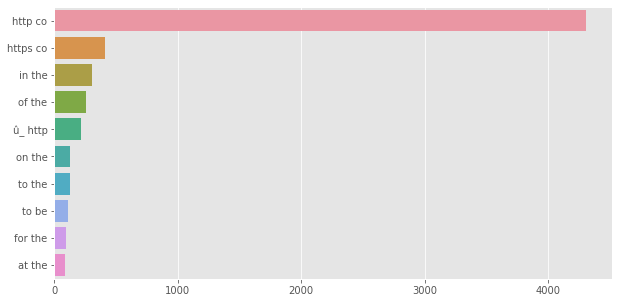

Требуется очистка данных

### Data Cleaning

Проведем некоторую базовую очистку, такую как исправление орфографии, удаление знаков препинания, удаление тегов HTML, смайликов и т.д.

Функция удаления урлов

In [62]:
url_example="New competition launched :https://www.kaggle.com/c/nlp-getting-started"

In [63]:
def remove_url(text):
    return re.sub(r'https?://\S+|www\.\S+', '', text)

In [64]:
remove_url(url_example)

'New competition launched :'

'New competition launched :'

Применить к датафрейму

In [65]:
data['text'] = data['text'].apply(lambda x : remove_url(x))

Удаление HTML-тегов 

In [66]:
html_example = """<div>
<h1>Real or Fake</h1>
<p>Kaggle </p>
<a href="https://www.kaggle.com/c/nlp-getting-started">getting started</a>
</div>"""

In [67]:
def remove_html(text):
    return re.sub(r'<.*?>', '', text)

In [69]:
print(remove_html(html_example))


Real or Fake
Kaggle 
getting started




Real or Fake
Kaggle 
getting started



Применить к датафрейму

In [70]:
data['text'] = data['text'].apply(lambda x : remove_html(x))

Удаление emojis

см. https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b

In [71]:
emoji_example = 'Omg another Earthquake 😔😔'

In [72]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [73]:
remove_emoji(emoji_example)

'Omg another Earthquake '

Применить к датафрейму

In [74]:
data['text'] = data['text'].apply(lambda x : remove_emoji(x))

Удаление знаков препинания 

In [75]:
punct_example="I am a #king"

In [76]:
def remove_punct(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [77]:
remove_punct(punct_example)

'I am a king'

I am a king


Применить к датафрейму

In [78]:
data['text'] = data['text'].apply(lambda x : remove_punct(x))

Посмотрели, почистили, хватит )